# K-Nearest Neighbors
KNN, ou « K-Nearest Neighbors » pour « K plus proches voisins »

KNN ne construit pas de modèle pendant l’entraînement. Il attend qu’on lui donne un exemple à prédire, puis :
- Il calcule la distance (souvent euclidienne) entre cet exemple et tous les autres exemples d’entraînement.
- Il prend les K plus proches voisins.

Il vote :
- En classification : il choisit la classe majoritaire parmi ces voisins.
- En régression : il fait la moyenne des valeurs des voisins.

Chaque donnée est classée en fonction des K données les plus proches dans l’espace des variables. K est donc un des hyperparamètres à déterminer.

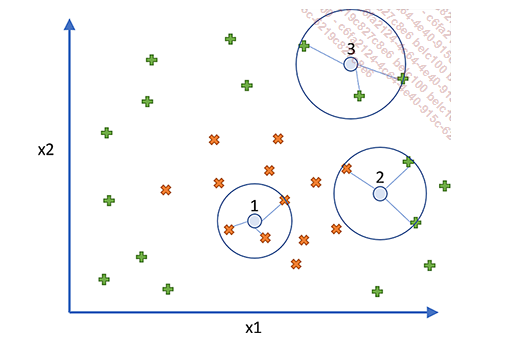

Dans cet exemple, deux classes sont représentées par des signes plus (+) et des signes croix (X). Trois données sont à prédire (cercles) et K a été fixé à 3 :

Cercle 1 : les trois voisins les plus proches sont X, la donnée 1 sera donc classée comme X.

Cercle 2 : les trois voisins se répartissent en deux + et un X, la donnée est donc classée par un vote à la majorité comme étant +.

Cercle 3 : les trois voisins sont +, la donnée est classée comme +.

K trop faible = peu de voisins et donc très sensible aux cas particuliers (suraprentissage)

K trop grand = Les frontières entre les classes s'effaces

Par convention on vise K=5

KNN est un algorithme déterministe, donc pas besoin de graine aléatoire.
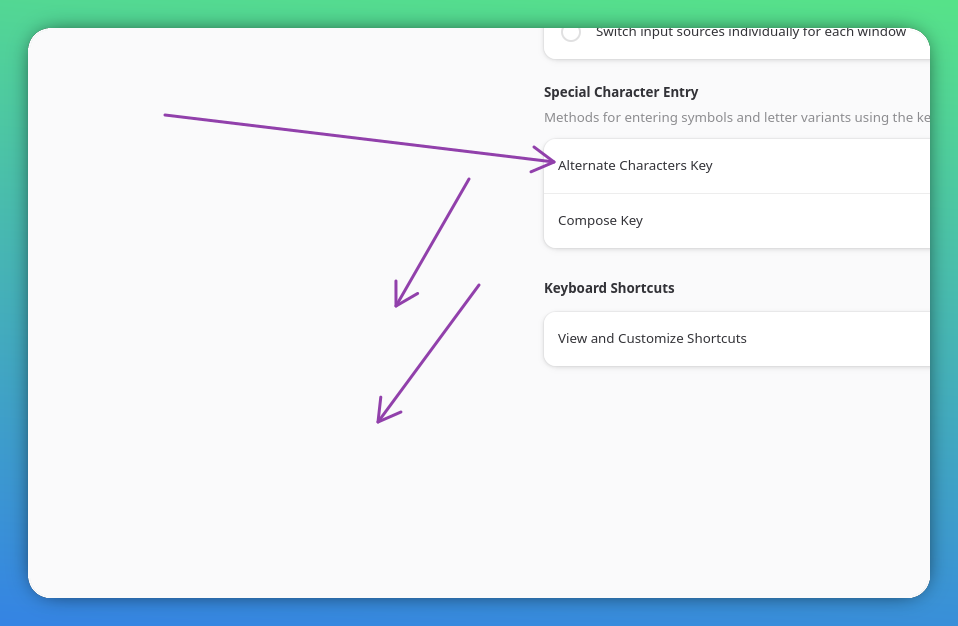

In [5]:
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Charger les données
titanic_df = pd.read_csv("titanic.csv")

# Prétraitement minimal : supprimer les colonnes non numériques
titanic_df = titanic_df.select_dtypes(include=['number'])  # garde seulement les colonnes numériques

# Séparer features et cible
y = titanic_df['Survived']
X = titanic_df.drop(['PassengerId', 'Survived'], axis=1)

# Séparer en train/test
train_X_titanic, test_X_titanic, train_y_titanic, test_y_titanic = train_test_split(X, y, train_size=0.8, random_state=42)

#Modèle
knn = KNeighborsClassifier(n_neighbors=3)
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Remplace les NaN par la moyenne
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = pipeline.predict(test_X_titanic)

print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        50
           1       0.48      0.29      0.36        34

    accuracy                           0.58        84
   macro avg       0.55      0.54      0.53        84
weighted avg       0.56      0.58      0.56        84

